# Vocabulary

In [2]:
import warnings
warnings.filterwarnings("ignore")
from collections import defaultdict
from tqdm.autonotebook import tqdm
#import pandas as pd
import mysql.connector
import codecs
codecs.register(lambda name: codecs.lookup('utf8') if name == 'utf8mb4' else None)
import conllu
from nltk import ngrams

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd='password',
  #database="small_commits_db"
  database='commits_db',
  charset='utf8mb4')

mycursor = mydb.cursor()

### top languages

In [9]:
mycursor.execute('SELECT DISTINCT count(id), language from R GROUP BY language')
languages = {}
for i in mycursor.fetchall():
    if i[0] > 1000 and i[1] is not None:
        languages[i[1]] = (i[0], len(languages),)

In [10]:
for i in sorted(languages, key=languages.get, reverse=True):
    print (i, languages[i])

JavaScript (17480, 7)
Python (8689, 10)
Java (8357, 6)
Objective-C (3890, 8)
PHP (3540, 9)
Go (3496, 4)
C++ (3449, 2)
Ruby (3379, 11)
C (3202, 0)
Swift (2222, 13)
HTML (2150, 5)
C# (2019, 1)
Shell (1770, 12)
CSS (1675, 3)
TypeScript (1145, 14)


### frequency dictinonary

In [8]:
def yield_lemma_pos():
    mycursor.execute('SELECT conllu, language FROM C LEFT JOIN R ON C.repo_id=R.gh_id')
    text = mycursor.fetchone()
    #print (text)
    while text:
        doc = conllu.parse(text[0])
        for sent in doc:
            yield text[1], [i['lemma']+'_'+i['upostag'] for i in sent.tokens]
        text = mycursor.fetchone()

In [9]:
dictionary = defaultdict(lambda: [0]*(len(languages)+1))
#commits = CommitIterator2()
for item in tqdm(yield_lemma_pos()):
    #print (sent)
    lang, sent = item
    try:
        lang = languages[lang][1]
    except:
        lang = -1
    for word in sent:
        item = word.replace('_','')
        if item.isalnum() and not item.isnumeric():
            dictionary[word][lang] += 1

In [10]:
with open('frequency_dict.csv', 'w') as f:
    header = ['Lemma', 'POS']+[i for i in sorted(languages, key=lambda x: languages[x][1])]+['Other']
    f.write('\t'.join(header)+'\n')
    for key in sorted(dictionary, key=lambda x: sum(dictionary[x]), reverse=True):
        word_and_pos = key.split('_')
        pos = word_and_pos[-1]
        word = '_'.join(word_and_pos[:-1])
        row = [word, pos]+[str(i) for i in dictionary[key]]
        f.write('\t'.join(row)+'\n')

In [11]:
! head -n 3 frequency_dict.csv

Lemma	POS	C	C#	C++	CSS	Go	HTML	Java	JavaScript	Objective-C	PHP	Python	Ruby	Shell	Swift	TypeScript	Other
the	DET	6289521	913718	5531907	106821	1213874	458676	2927720	2461062	276228	1843475	2821761	1473350	325540	117084	216396	5362961
be	AUX	3981615	542228	3509888	53897	727702	244351	2038527	1536526	164550	1149695	1758537	875402	216100	64745	133059	3392836


In [11]:
from collections import defaultdict

dct = defaultdict(lambda: np.zeros(16))
k = 0
for line in tqdm(open('frequency_dict.csv')):
    if k == 0:
        header = line.strip()
        k += 1
    else:
        row = line.strip().split('\t')
        if row[1] != 'PROPN':
            row[0] = row[0].lower()
        nmbrs = [int(i) for i in row[2:]]
        #print(nmbrs)
        nmbrs = np.array(nmbrs)
        dct[(row[0], row[1])] += nmbrs

In [13]:
with open('frequency_dict_proc.csv', 'w') as f:
    #header = ['Lemma', 'POS']+[i for i in sorted(languages, key=lambda x: languages[x][1])]+['Other']
    f.write(header+'\tTotal\n')
    for key in sorted(dct, key=lambda x: sum(dct[x]), reverse=True):
        if sum(dct[key]) > 100:
            word, pos = key
            row = [word, pos]+[str(int(i)) for i in dct[key]]+[str(int(sum(dct[key])))]
            f.write('\t'.join(row)+'\n')

In [ ]:
len(dct)

16621670

In [1]:
from collections import defaultdict
from tqdm.autonotebook import tqdm
import numpy as np

dct = defaultdict(lambda: np.zeros(16))
k = 0
for line in tqdm(open('frequency_dict.csv')):
    if k == 0:
        header = line.strip()
        k += 1
    else:
        row = line.strip().split('\t')
        if row[1] != 'PROPN':
            row[0] = row[0].lower()
            nmbrs = [int(i) for i in row[2:]]
            #print(nmbrs)
            nmbrs = np.array(nmbrs)
            dct[row[0]] += nmbrs

/home/glznv/.local/lib/python3.5/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
with open('frequency_dict_no_pos_proc.csv', 'w') as f:
    #header = ['Lemma', 'POS']+[i for i in sorted(languages, key=lambda x: languages[x][1])]+['Other']
    f.write(header+'\tTotal\n')
    for key in sorted(dct, key=lambda x: sum(dct[x]), reverse=True):
        if sum(dct[key]) > 100:
            row = [key]+[str(int(i)) for i in dct[key]]+[str(int(sum(dct[key])))]
            f.write('\t'.join(row)+'\n')

In [16]:
len(dct)

NameError: name 'dct' is not defined

In [4]:
from collections import defaultdict
from tqdm.autonotebook import tqdm
import numpy as np

total = np.zeros(16)
k = 0
for line in tqdm(open('frequency_dict.csv')):
    if k == 0:
        header = line.strip()
        k += 1
    else:
        row = line.strip().split('\t')
        nmbrs = [int(i) for i in row[2:]]
        nmbrs = np.array(nmbrs)
        total += nmbrs
total

array([1.81315091e+08, 3.16582390e+07, 1.74045202e+08, 4.92017000e+06,
       4.20961960e+07, 1.79098700e+07, 1.09853510e+08, 1.03324339e+08,
       1.00070100e+07, 7.11362970e+07, 1.02093863e+08, 5.06639010e+07,
       1.53222890e+07, 5.61040200e+06, 1.09786910e+07, 1.81107190e+08])

In [6]:
names = header.strip().split('\t')[2:]
for key, value in enumerate(names):
    print (value, '\t', int(total[key]))

C 	 181315091
C# 	 31658239
C++ 	 174045202
CSS 	 4920170
Go 	 42096196
HTML 	 17909870
Java 	 109853510
JavaScript 	 103324339
Objective-C 	 10007010
PHP 	 71136297
Python 	 102093863
Ruby 	 50663901
Shell 	 15322289
Swift 	 5610402
TypeScript 	 10978691
Other 	 181107190


In [10]:
int(sum(total))

1112042260

In [9]:
sum(total)/75000000

14.827230133333334

### number of words in corpora

In [ ]:
total = 0
for item in tqdm(yield_lemma_pos()):
    #print (sent)
    lang, sent = item
    total += len(sent)
total

In [ ]:
len(dictionary)

In [13]:
37654156/len(dictionary)

43.38526239137598

# top ngrams

In [16]:
def yield_lemma_pos():
    mycursor.execute('SELECT conllu, language FROM C LEFT JOIN R ON C.repo_id=R.gh_id;')
    text = mycursor.fetchone()
    #print (text)
    while text:
        doc = conllu.parse(text[0])
        for sent in doc:
            snt = []
            for i in sent.tokens:
                if i['upostag'] != 'PROPN':
                    snt.append((i['lemma'].lower()+'_'+i['upostag']))
                else:
                    snt.append(i['lemma']+'_'+i['upostag'])
            yield text[1], snt
        text = mycursor.fetchone()

In [7]:
take = set(['ADJ','ADV','AUX','NOUN','PART','VERB'])

In [8]:
def ngram_list(n=2):
    dictionary = defaultdict(lambda: [0]*(len(languages)+1))
    for item in tqdm(yield_lemma_pos()):
        lang, sent = item
        
        try:
            lang = languages[lang][1]
        except:
            lang = -1
        ng = ngrams(sent, n)
        for ngram in ng:
            ngpos = set([i.split('_')[-1] for i in ngram])
            if len(ngpos & take) == len(ngpos):
                dictionary[ngram][lang] += 1
    
    with open('./results/{}grams.csv'.format(n), 'w') as f:
        header = ['Ngram']+[i for i in sorted(languages, key=lambda x: languages[x][1])]+['Other']
        f.write('\t'.join(header)+'\n')
        for key in sorted(dictionary, key=lambda x: sum(dictionary[x]), reverse=True):
            if sum(dictionary[key]) >= 5:
                word = ' '.join(key)
                #pos = word_and_pos[-1]
                row = [word]+[str(i) for i in dictionary[key]]
                f.write('\t'.join(row)+'\n')

In [17]:
    #ngram_list(n=2)
    n = 2
    dictionary = defaultdict(lambda: [0]*(len(languages)+1))
    for item in tqdm(yield_lemma_pos()):
        lang, sent = item
        
        try:
            lang = languages[lang][1]
        except:
            lang = -1
        ng = ngrams(sent, n)
        for ngram in ng:
            ngpos = set([i.split('_')[-1] for i in ngram])
            words = ' '.join(['_'.join(i.split('_')[:-1]) for i in ngram])
            if len(ngpos & take) == len(ngpos):
                dictionary[words][lang] += 1
    
    with open('./results/{}grams.csv'.format(n), 'w') as f:
        header = ['Ngram']+[i for i in sorted(languages, key=lambda x: languages[x][1])]+['Other']
        f.write('\t'.join(header)+'\n')
        for key in sorted(dictionary, key=lambda x: sum(dictionary[x]), reverse=True):
            if sum(dictionary[key]) >= 5:
                #word = ' '.join(key)
                word = key
                #pos = word_and_pos[-1]
                row = [word]+[str(i) for i in dictionary[key]]
                f.write('\t'.join(row)+'\n')

In [15]:
dictionary = defaultdict(int)
k = 0
with open('/home/glznv/GitHub/Git_Commits/notebooks_full/results/2grams.csv') as f:
    for line in f:
        if k != 0:
            ngram = tuple([i.split('_')[-1] for i in line.split('\t')[0].split()])
            summ = sum(int(i) for i in line.split('\t')[1:])
            dictionary[ngram] += summ
        else:
            k += 1
for key in sorted(dictionary, key=dictionary.get, reverse=True):
    print (key, dictionary[key])

('request', '#') 11
('pull', 'request') 11
('merge', 'pull') 11
('do', 'not') 8
('try', 'to') 5
('remote', 'branch') 5
('merge', 'remote') 5


In [24]:
ok_2 = set([('NOUN', 'NOUN'), ('ADJ', 'NOUN'), ('VERB', 'NOUN'), ('VERB', 'ADP'), ('AUX', 'VERB'), 
          ('ADV', 'VERB'), ('NOUN', 'VERB'),
          ('ADP', 'NOUN'), ('VERB', 'ADJ'),  ('VERB', 'ADV')])

In [25]:
k = 0
with open('/home/dkbrz/GitHub/Git_Commits/results_small/2grams.csv') as fin, \
    open('./results_small/2grams_filtered.csv', 'w') as fout:
    for line in fin:
        if k != 0:
            ngram = tuple([i.split('_')[-1] for i in line.split('\t')[0].split()])
            if ngram in ok_2:
                fout.write(line)
        else:
            fout.write(line)
            k += 1

In [26]:
ngram_list(n=3)

In [ ]:
dictionary = defaultdict(int)
k = 0
with open('/home/dkbrz/GitHub/Git_Commits/results_small/3grams.csv') as f:
    for line in f:
        if k != 0:
            ngram = tuple([i.split('_')[-1] for i in line.split('\t')[0].split()])
            summ = sum(int(i) for i in line.split('\t')[1:])
            dictionary[ngram] += summ
        else:
            k += 1
for key in sorted(dictionary, key=dictionary.get, reverse=True):
    if 'PUNCT' not in key:
        print (key, dictionary[key])

In [11]:
ok_3 = set([
    ('NOUN', 'NOUN', 'NOUN'), ('VERB', 'DET', 'NOUN'), ('AUX', 'PART', 'VERB'), ('NOUN', 'ADP', 'NOUN'),
    ('NOUN', 'PART', 'VERB'), ('VERB', 'PART', 'VERB'), ('VERB', 'ADJ', 'NOUN'), ('VERB', 'NOUN', 'NOUN'),
    ('VERB', 'ADP', 'NOUN'), ('ADJ', 'NOUN', 'NOUN'), ('AUX', 'AUX', 'VERB'), ('NOUN', 'AUX', 'VERB'),
    ('AUX', 'ADV', 'VERB')
])

In [12]:
k = 0
with open('/home/dkbrz/GitHub/Git_Commits/results_small/3grams.csv') as fin, \
    open('./results_small/3grams_filtered.csv', 'w') as fout:
    for line in fin:
        if k != 0:
            ngram = tuple([i.split('_')[-1] for i in line.split('\t')[0].split()])
            if ngram in ok_3:
                fout.write(line)
        else:
            fout.write(line)
            k += 1

In [7]:
ngram_list(n=4)

In [ ]:
dictionary = defaultdict(int)
k = 0
with open('/home/dkbrz/GitHub/Git_Commits/results_small/4grams.csv') as f:
    for line in f:
        if k != 0:
            ngram = tuple([i.split('_')[-1] for i in line.split('\t')[0].split()])
            summ = sum(int(i) for i in line.split('\t')[1:])
            dictionary[ngram] += summ
        else:
            k += 1
for key in sorted(dictionary, key=dictionary.get, reverse=True):
    if 'PUNCT' not in key:
        print (key, dictionary[key])

In [17]:
ok_4 = set([
    ('NOUN', 'NOUN', 'NOUN', 'NOUN'), ('VERB', 'DET', 'NOUN', 'ADP'),
    ('ADP', 'DET', 'ADJ', 'NOUN'), ('NOUN', 'ADP', 'DET', 'NOUN'), ('VERB', 'NOUN', 'ADP', 'NOUN'),
    ('VERB', 'DET', 'ADJ', 'NOUN'), ('ADP', 'DET', 'NOUN', 'NOUN'), ('AUX', 'PART', 'VERB', 'ADP'),
    ('NOUN', 'ADP', 'NOUN', 'NOUN'), ('NOUN', 'NOUN', 'ADP', 'NOUN'), ('VERB', 'DET', 'NOUN', 'NOUN'),
    ('NOUN', 'ADP', 'ADJ', 'NOUN'), ('ADJ', 'NOUN', 'ADP', 'NOUN'),
    ('AUX', 'VERB', 'PART', 'VERB')
])

In [18]:
k = 0
with open('/home/dkbrz/GitHub/Git_Commits/results_small/4grams.csv') as fin, \
    open('./results_small/4grams_filtered.csv', 'w') as fout:
    for line in fin:
        if k != 0:
            ngram = tuple([i.split('_')[-1] for i in line.split('\t')[0].split()])
            if ngram in ok_4:
                fout.write(line)
        else:
            fout.write(line)
            k += 1

### commit length in sentences

In [19]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd='password',
  #database="small_commits_db"
  database='commits_db',
  charset='utf8mb4')

mycursor = mydb.cursor()

In [20]:
def yield_sentences(out='gensim', mode='lemma', joint=True):
    mycursor.execute('SELECT conllu, language FROM C LEFT JOIN R ON C.repo_id=R.gh_id')
    text = mycursor.fetchmany(1000)
    #print (text)
    while text:
        #doc = conllu.parse(text[0])
        #print (doc)
        yield text
        text = mycursor.fetchmany(1000)

In [5]:
import re

In [22]:
dictionary = defaultdict(lambda: [0]*(len(languages)+1))
for batch in tqdm(yield_sentences(joint=False)):
    for item in batch:
        lang, doc = item[1], re.findall('# sent_id =', item[0])#conllu.parse(item[0])
        if type(doc) == list:
            length = len(doc)
        else:
            length = 1
        try:
            lang = languages[lang][1]
        except:
            lang = -1
        dictionary[length][lang] += 1

In [39]:
len(dictionary)

979

In [25]:
with open('./results/length_in_sentences.csv', 'w') as f:
    header = ['Ngram']+[i for i in sorted(languages, key=lambda x: languages[x][1])]+['Other']
    f.write('\t'.join(header)+'\n')
    for key in sorted(dictionary, key=lambda x: sum(dictionary[x]), reverse=True):
        word = str(key)
        #pos = word_and_pos[-1]
        row = [word]+[str(i) for i in dictionary[key]]
        f.write('\t'.join(row)+'\n')

In [56]:
df = pd.read_csv('./results/length_in_sentences.csv', sep='\t').sort_values(by='Ngram')
df['Total'] = df[['Ruby', 'C', 'Java', 'Other', 'C++', 'Python', 'JavaScript', 'PHP',
       'C#', 'Objective-C', 'HTML', 'CSS', 'Shell', 'Go', 'Swift']].sum(axis=1)
df = df.reindex_axis(sorted(df.columns, key=lambda x: df[x].sum(), reverse=True), axis=1)

In [57]:
df.sum(axis=0)

Total          82342665
Other          12758436
C++            11211826
JavaScript     10680034
Java            9182463
Python          8853404
C               8635709
PHP             5857592
Ruby            3986113
C#              2794723
Go              2770668
HTML            1703028
Shell           1516924
TypeScript      1220984
Objective-C     1028966
Swift            708604
CSS              654175
Ngram            581155
dtype: int64

In [58]:
ng = df['Ngram']

In [59]:
del df['Ngram'], #df['TypeScript'],  df['Go'], df['Swift']

In [60]:
df = df/df.sum()

In [61]:
df.index = ng
df.head()

,Total,Other,C++,JavaScript,Java,Python,C,PHP,Ruby,C#,Go,HTML,Shell,TypeScript,Objective-C,Swift,CSS
Ngram,,,,,,,,,,,,,,,,,
0,0.001527,0.000388,0.002201,0.000304,0.002339,0.000697,0.004346,0.001476,0.000133,0.004102,0.001497,0.000880,0.000684,0.000009,0.000299,0.000010,0.000063
1,0.575462,0.570272,0.518680,0.689391,0.552677,0.630290,0.399158,0.593817,0.597720,0.640675,0.534669,0.619192,0.615959,0.712195,0.682757,0.738448,0.736127
2,0.233386,0.215002,0.242050,0.212280,0.248551,0.236608,0.251958,0.233019,0.226201,0.231670,0.267901,0.244521,0.242235,0.199940,0.211015,0.209091,0.206592
3,0.085953,0.091980,0.111901,0.050095,0.099926,0.066860,0.124676,0.076540,0.087861,0.065164,0.076814,0.061302,0.082548,0.048048,0.057884,0.031225,0.035912
4,0.037850,0.041467,0.047815,0.019064,0.040839,0.027246,0.072415,0.032526,0.028739,0.025440,0.039581,0.026697,0.028135,0.014729,0.019610,0.008051,0.009877


In [62]:
df.columns

Index(['Total', 'Other', 'C++', 'JavaScript', 'Java', 'Python', 'C', 'PHP',
       'Ruby', 'C#', 'Go', 'HTML', 'Shell', 'TypeScript', 'Objective-C',
       'Swift', 'CSS'],
      dtype='object')

In [63]:
df[1:10]

,Total,Other,C++,JavaScript,Java,Python,C,PHP,Ruby,C#,Go,HTML,Shell,TypeScript,Objective-C,Swift,CSS
Ngram,,,,,,,,,,,,,,,,,
1,0.575462,0.570272,0.518680,0.689391,0.552677,0.630290,0.399158,0.593817,0.597720,0.640675,0.534669,0.619192,0.615959,0.712195,0.682757,0.738448,0.736127
2,0.233386,0.215002,0.242050,0.212280,0.248551,0.236608,0.251958,0.233019,0.226201,0.231670,0.267901,0.244521,0.242235,0.199940,0.211015,0.209091,0.206592
3,0.085953,0.091980,0.111901,0.050095,0.099926,0.066860,0.124676,0.076540,0.087861,0.065164,0.076814,0.061302,0.082548,0.048048,0.057884,0.031225,0.035912
4,0.037850,0.041467,0.047815,0.019064,0.040839,0.027246,0.072415,0.032526,0.028739,0.025440,0.039581,0.026697,0.028135,0.014729,0.019610,0.008051,0.009877
5,0.021535,0.023577,0.026326,0.009612,0.023805,0.014652,0.047172,0.017818,0.014193,0.012007,0.023114,0.014632,0.011666,0.008151,0.011986,0.003716,0.004340
6,0.013128,0.015647,0.015931,0.005636,0.013461,0.007871,0.030131,0.009962,0.009120,0.006299,0.014831,0.009426,0.006621,0.004594,0.006295,0.002241,0.002324
7,0.008368,0.009944,0.010092,0.003646,0.007389,0.004510,0.019609,0.006807,0.008193,0.003722,0.010267,0.006077,0.003895,0.002889,0.003211,0.001637,0.001307
8,0.005570,0.006751,0.006631,0.002450,0.003474,0.002821,0.012897,0.005420,0.007655,0.002474,0.007435,0.004191,0.002344,0.002035,0.001870,0.001153,0.000844
9,0.003901,0.004815,0.004395,0.001687,0.001969,0.001872,0.008844,0.004744,0.006114,0.001757,0.005541,0.002857,0.001347,0.001382,0.001188,0.000783,0.000598


In [64]:
df = df[1:10]

In [66]:
df = df[:5]

Text(0, 0.5, '% out of commits')

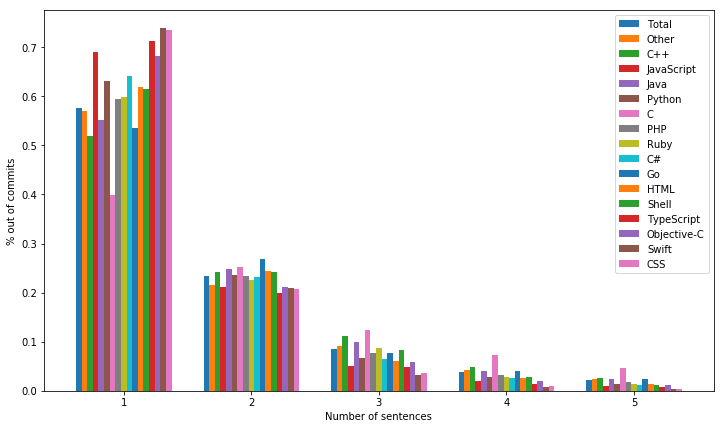

In [70]:
df.plot(figsize=(12, 7), kind='bar', rot=0, logy=False, width=0.75);
plt.xlabel('Number of sentences')
plt.ylabel('% out of commits')
#df.plot.bar(rot=0);

In [36]:
del df['Total']

In [37]:
corr = np.corrcoef(df.T)

In [6]:
import seaborn as sns

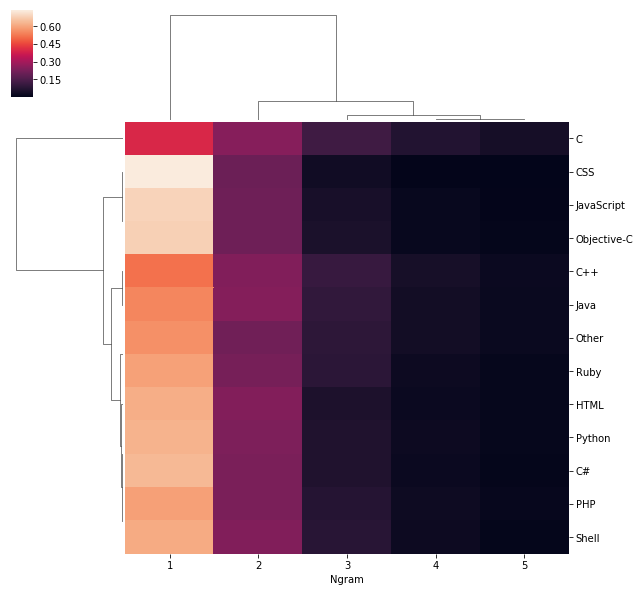

In [41]:
sns.clustermap(df[:5].T, metric="correlation")

### length of commit sentences 

In [7]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd='password',
  database="commits_db",
  charset='utf8mb4')

mycursor = mydb.cursor()

In [47]:
def yield_lengths(n=1):
    #mycursor.execute('SELECT conllu, language FROM C LEFT JOIN R ON C.repo_id=R.gh_id LIMIT 1000;')
    mycursor.execute('SELECT conllu, language FROM C LEFT JOIN R ON C.repo_id=R.gh_id')
    text = mycursor.fetchone()
    while text:
        doc = conllu.parse(text[0])
        if len(doc) == n:
            yield text[1], [len(i) for i in doc]
        text = mycursor.fetchone()

def yield_lengths(n=1):
    #mycursor.execute('SELECT conllu, language FROM C LEFT JOIN R ON C.repo_id=R.gh_id LIMIT 1000;')
    mycursor.execute('SELECT conllu, language FROM C LEFT JOIN R ON C.repo_id=R.gh_id;')
    text = mycursor.fetchone()
    while text:
        doc = re.sub('# newdoc\n', '', text[0])#conllu.parse(text[0])
        doc = re.sub('# newpar\n', '', doc)
        doc = re.sub('\n+', '\n', doc)
        doc = doc.split('# sent_id')
        if len(doc)-1 == n:
            yield text[1], [len(i.split('\n'))-1 for i in doc[1:]]
        text = mycursor.fetchone()

In [21]:
import seaborn as sns
labels = list(languages.keys())+['Other']

In [43]:
def show_lengths(n=1):
    matrix_sum = np.zeros((n,len(languages)+1))
    #matrix_df = []
    matrix_n = np.zeros(len(languages)+1)
    for item in tqdm(yield_lengths(n=n)):
        lang, lengths = item
        if len(lengths) == n:
            if lang not in languages:
                lang2 = 'Other'
            else:
                lang2 = lang
            try:
                lang = languages[lang][1]
            except:
                lang = -1
            for i in range(n):
                matrix_sum[i][lang] += lengths[i]
                #matrix_df.append([lang2, str(i+1), lengths[i]])
            matrix_n[lang] += 1
    #matrix_df = pd.DataFrame(matrix_df)
    #matrix_df.columns = ['Language', 'N-th', 'Length']
    return matrix_sum/matrix_n, matrix_n #, matrix_df

In [44]:
def plot_sentences(n=2):
    fig = plt.figure(figsize=(20,10))
    #ax1 = fig.add_subplot(221)
    #ax2 = fig.add_subplot(222)
    ax1 = plt.subplot2grid((2, 3), (0, 1), colspan=1)
    ax2 = plt.subplot2grid((2, 3), (0, 2), colspan=1)
    #ax3 = plt.subplot2grid((2, 3), (1, 1), colspan=2)

    #A, N, matrix_df = show_lengths(n=n)
    A, N = show_lengths(n=n)
    ax1 = sns.heatmap(A.T, annot=True, fmt=".3f", yticklabels=labels, xticklabels=list(range(1,n+1)), ax=ax1)
    ax1.set_xlabel('N-th sentence')
    ax1.set_ylabel('Language')
    ax1.set_title('Mean length of sentences in {}-senten commits'.format(n))
    
    _ = pd.DataFrame(data={'N':N})
    _.index = labels
    ax2 = sns.barplot(data=_.T, color='green', ecolor='black', orient='h', ax=ax2)
    ax2.set_xlabel('N of {}-senten commits'.format(n));
    ax2.set_title('N of {}-sentence commits'.format(n))
    
    #ax3 = sns.boxplot(data=matrix_df, x=matrix_df['Language'], 
    #                  y=matrix_df['Length'], hue=matrix_df['N-th'], palette="Set1", showfliers=False, ax=ax3)
    #ax3.set_xticklabels(ax3.get_xticklabels(), rotation = 90)
    #ax3.set_xlabel('Language'.format(n))
    #ax3.set_ylabel('Length'.format(n));
    
    plt.show()

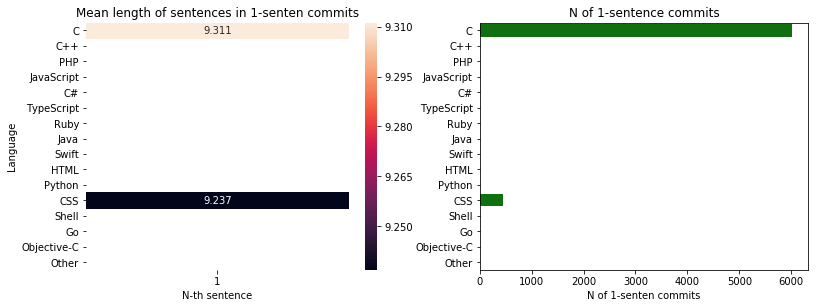

In [45]:
plot_sentences(n=1)

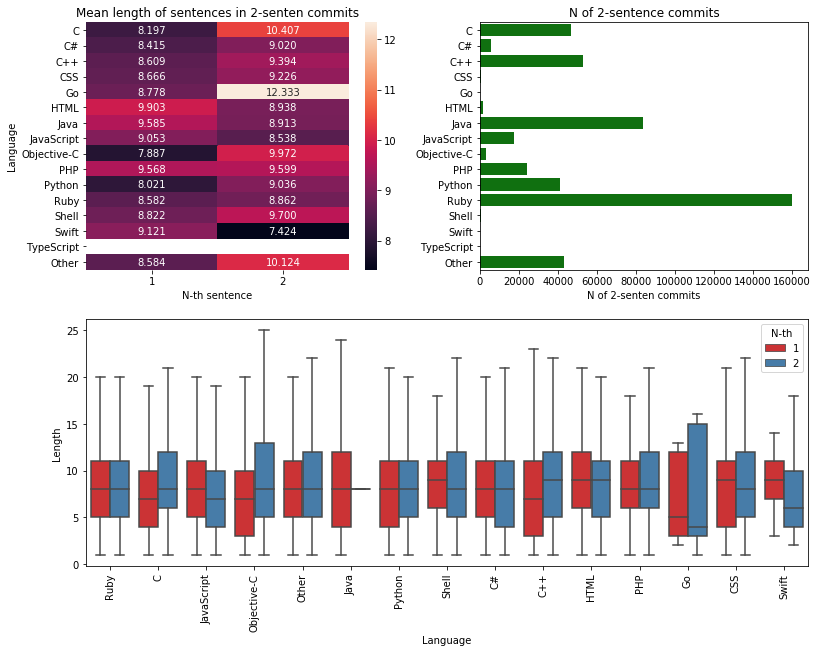

In [64]:
plot_sentences(n=2)

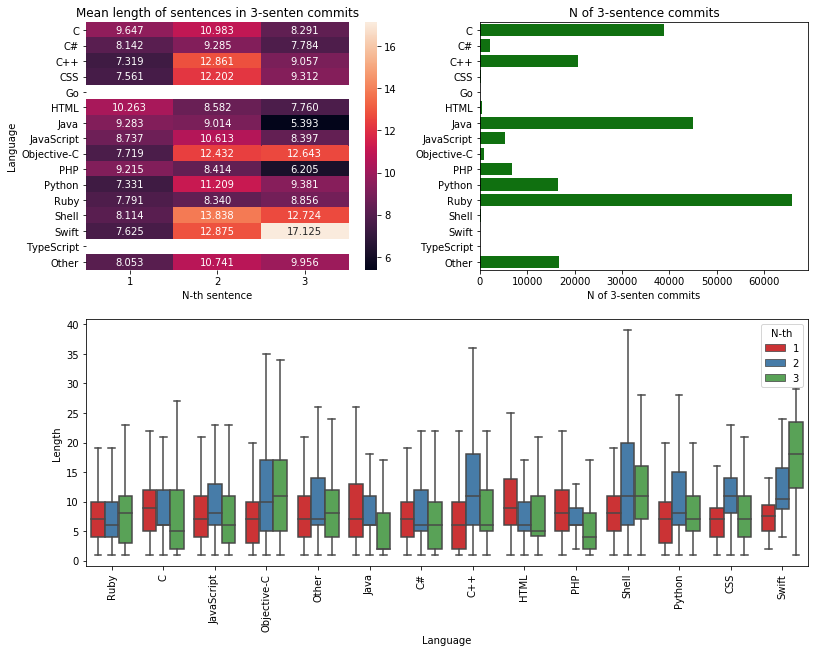

In [65]:
plot_sentences(n=3)

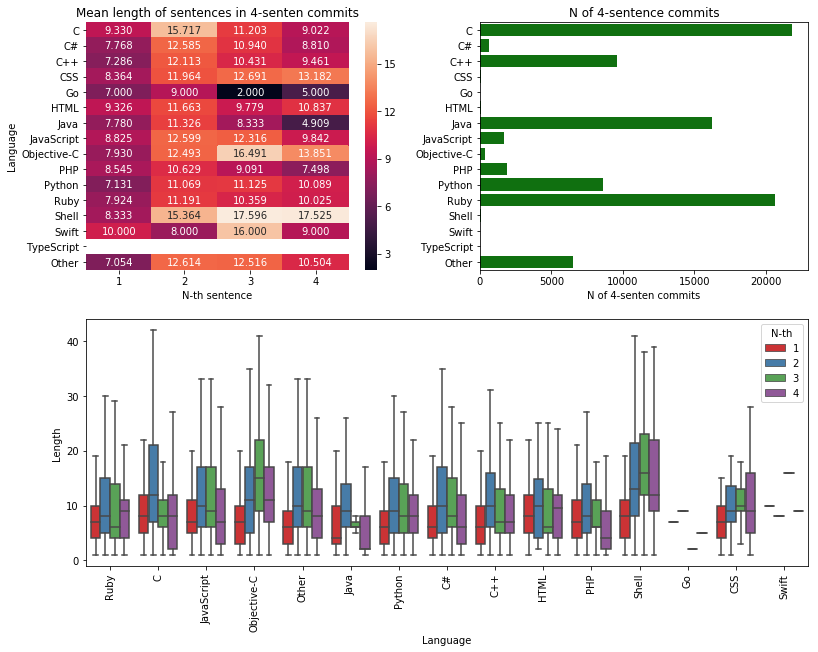

In [66]:
plot_sentences(n=4)

KeyboardInterrupt: 

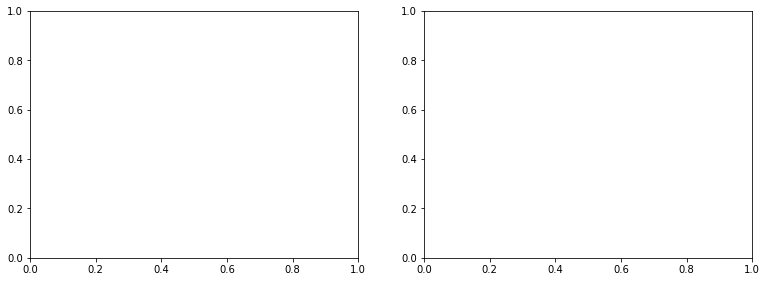

In [48]:
plot_sentences(n=5)

In [102]:
matrix_sum = np.zeros((2,len(languages)+1))
matrix_n = np.zeros((2,len(languages)+1))

matrix_sum[0] += 5
matrix_sum[1] += 3
matrix_n += 10
(matrix_sum/matrix_n)[0]

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5])

In [19]:
def yield_lengths_one_vs_many():
    #mycursor.execute('SELECT conllu, language FROM C LEFT JOIN R ON C.repo_id=R.gh_id LIMIT 1000;')
    mycursor.execute('SELECT conllu, language FROM C LEFT JOIN R ON C.repo_id=R.gh_id;')
    text = mycursor.fetchone()
    while text:
        doc = re.sub('# newdoc\n', '', text[0])#conllu.parse(text[0])
        doc = re.sub('# newpar\n', '', doc)
        doc = re.sub('\n+', '\n', doc)
        doc = doc.split('# sent_id')
        if len(doc) > 1:
            yield text[1], [len(i.split('\n'))-1 for i in doc[1:]]
        text = mycursor.fetchone()

def show_lengths_one_vs_many():
    matrix_sum = np.zeros((2,len(languages)+1))
    #matrix_df = []
    matrix_n = np.zeros((2,len(languages)+1))
    for item in tqdm(yield_lengths_one_vs_many()):
        lang, lengths = item
        if len(lengths) > 1:
            if lang not in languages:
                lang2 = 'Other'
            else:
                lang2 = lang
            try:
                lang = languages[lang][1]
            except:
                lang = -1
            
            matrix_sum[0][lang] += lengths[0]
            #matrix_df.append([lang2, '1', lengths[0]])
            matrix_n[0][lang] += 1
            
            for i in range(1, len(lengths)):
                matrix_sum[1][lang] += lengths[i]
                #matrix_df.append([lang2, '2+', lengths[i]])
           
            matrix_n[1][lang] = matrix_n[1][lang] + len(lengths) - 1
    #matrix_df = pd.DataFrame(matrix_df)
    #matrix_df.columns = ['Language', 'N-th', 'Length']
    return matrix_sum/matrix_n, matrix_n[0,:], None#, matrix_df

def plot_sentences_one_vs_many():
    fig = plt.figure(figsize=(20,10))
    #ax1 = fig.add_subplot(221)
    #ax2 = fig.add_subplot(222)
    ax1 = plt.subplot2grid((2, 3), (0, 1), colspan=1)
    ax2 = plt.subplot2grid((2, 3), (0, 2), colspan=1)
    #ax3 = plt.subplot2grid((2, 3), (1, 1), colspan=2)

    A, N, matrix_df = show_lengths_one_vs_many()
    ax1 = sns.heatmap(A.T, annot=True, fmt=".3f", yticklabels=labels, xticklabels=list(range(1,2+1)), ax=ax1)
    ax1.set_xlabel('N-th sentence')
    ax1.set_ylabel('Language')
    ax1.set_title('Mean length of sentences in commits \nwith 2+ sentences')
    
    _ = pd.DataFrame(data={'N':N})
    _.index = labels
    ax2 = sns.barplot(data=_.T, color='green', ecolor='black', orient='h', ax=ax2)
    ax2.set_xlabel('Mean length of sentences in commits \nwith 2+ sentences');
    ax2.set_title('Mean length of sentences in commits \nwith 2+ sentences')
    
    #ax3 = sns.boxplot(data=matrix_df, x=matrix_df['Language'], 
    #                  y=matrix_df['Length'], hue=matrix_df['N-th'], palette="Set1", showfliers=False, ax=ax3)
    #ax3.set_xticklabels(ax3.get_xticklabels(), rotation = 90)
    #ax3.set_xlabel('Language')
    #ax3.set_ylabel('Length');
    
    plt.show()

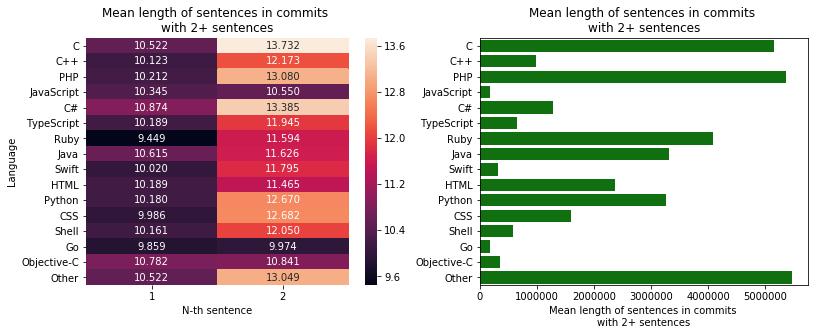

In [20]:
plot_sentences_one_vs_many()

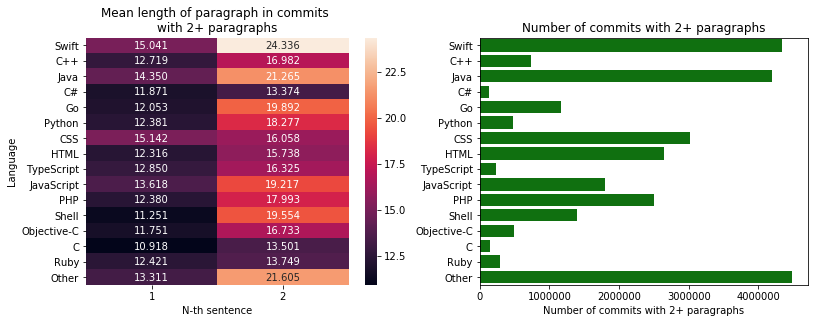

In [31]:
plot_sentences_one_vs_many()

In [38]:
reg_0 = re.compile('# newdoc\n')
#reg_1 = re.compile('# newpar')
reg_2 = re.compile('\n+')
def yield_lengths_one_vs_many():
    mycursor.execute('SELECT conllu, language FROM C LEFT JOIN R ON C.repo_id=R.gh_id LIMIT 10000;')
    #mycursor.execute('SELECT conllu, language FROM C LEFT JOIN R ON C.repo_id=R.gh_id;')
    text = mycursor.fetchone()
    while text:
        doc = re.sub(reg_0, '', text[0])#conllu.parse(text[0])
        doc = doc.split('# newpar')
        if len(doc) == 3:
            #print(doc)
            doc = [re.sub(reg_2, '\n', i.replace('# sent_id', '')).strip() for i in doc]
            yield text[1], [len(i.split('\n')) for i in doc[1:]]
        text = mycursor.fetchone()

def show_lengths_one_vs_many():
    matrix_sum = np.zeros((2,len(languages)+1))
    #matrix_df = []
    matrix_n = np.zeros((2,len(languages)+1))
    for item in tqdm(yield_lengths_one_vs_many()):
        lang, lengths = item
        if len(lengths) > 1:
            if lang not in languages:
                lang2 = 'Other'
            else:
                lang2 = lang
            try:
                lang = languages[lang][1]
            except:
                lang = -1
            
            matrix_sum[0][lang] += lengths[0]
            #matrix_df.append([lang2, '1', lengths[0]])
            matrix_n[0][lang] += 1
            
            for i in range(1, len(lengths)):
                matrix_sum[1][lang] += lengths[i]
                #matrix_df.append([lang2, '2+', lengths[i]])
           
            matrix_n[1][lang] = matrix_n[1][lang] + len(lengths) - 1
    #matrix_df = pd.DataFrame(matrix_df)
    #matrix_df.columns = ['Language', 'N-th', 'Length']
    return matrix_sum/matrix_n, matrix_n[0,:], None#, matrix_df

def plot_sentences_one_vs_many():
    fig = plt.figure(figsize=(20,10))
    #ax1 = fig.add_subplot(221)
    #ax2 = fig.add_subplot(222)
    ax1 = plt.subplot2grid((2, 3), (0, 1), colspan=1)
    ax2 = plt.subplot2grid((2, 3), (0, 2), colspan=1)
    #ax3 = plt.subplot2grid((2, 3), (1, 1), colspan=2)

    A, N, matrix_df = show_lengths_one_vs_many()
    ax1 = sns.heatmap(A.T, annot=True, fmt=".3f", yticklabels=labels, xticklabels=list(range(1,2+1)), ax=ax1)
    ax1.set_xlabel('N-th sentence')
    ax1.set_ylabel('Language')
    ax1.set_title('Mean length of paragraph in commits \nwith 2+ paragraphs')
    
    _ = pd.DataFrame(data={'N':N})
    _.index = labels
    ax2 = sns.barplot(data=_.T, color='green', ecolor='black', orient='h', ax=ax2)
    ax2.set_xlabel('Number of commits with 2+ paragraphs');
    ax2.set_title('Number of commits with 2+ paragraphs')
    
    #ax3 = sns.boxplot(data=matrix_df, x=matrix_df['Language'], 
    #                  y=matrix_df['Length'], hue=matrix_df['N-th'], palette="Set1", showfliers=False, ax=ax3)
    #ax3.set_xticklabels(ax3.get_xticklabels(), rotation = 90)
    #ax3.set_xlabel('Language')
    #ax3.set_ylabel('Length');
    
    plt.show()

In [50]:
import re
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd='password',
  database="commits_db",
  charset='utf8mb4')

mycursor = mydb.cursor()

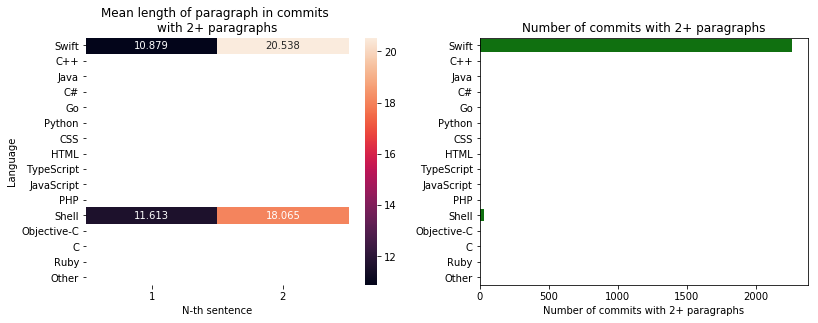

In [40]:
plot_sentences_one_vs_many()

In [48]:
reg_0 = re.compile('# newdoc\n')
#reg_1 = re.compile('# newpar')
reg_2 = re.compile('\n+')
file = open('/home/glznv/lengths.csv', 'w')
def yield_lengths_one_vs_many(file):
    #mycursor.execute('SELECT conllu, language FROM C LEFT JOIN R ON C.repo_id=R.gh_id LIMIT 10000;')
    mycursor.execute('SELECT conllu, language FROM C LEFT JOIN R ON C.repo_id=R.gh_id;')
    text = mycursor.fetchone()
    while text:
        doc = re.sub(reg_0, '', text[0])#conllu.parse(text[0])
        doc = doc.split('# newpar')
        if len(doc) == 3:
            doc = [re.sub(reg_2, '\n', i.replace('# sent_id', '')).strip().split('\n') for i in doc]
            print('{}\t{}\t{}'.format(text[1], len(doc[1]), len(doc[2])), file=file)
            yield text[1]
        text = mycursor.fetchone()

In [51]:
for item in tqdm(yield_lengths_one_vs_many(file=file)):
    pass

In [68]:
df = pd.read_csv('/home/glznv/lengths.csv', sep='\t', header=None)
df.columns = ['Language_', 'First', 'Second']

In [69]:
df.head()

,Language_,First,Second
0,Ruby,11,7
1,Ruby,8,40
2,Ruby,13,5
3,Ruby,13,10
4,Ruby,11,9


In [72]:
df['Language'] = [i if i in languages else 'Other' for i in df['Language_'].values ]

In [73]:
df.groupby(by='Language').mean()

,First,Second
Language,,
C,15.704154,16.440856
C#,12.626731,14.582984
C++,14.487685,17.025290
CSS,11.870844,12.465085
Go,12.020749,14.501593
HTML,12.260010,14.077125
Java,15.311426,13.327361
JavaScript,12.287656,13.306616
Objective-C,12.982346,14.193645


In [75]:
df1 = df[['Language', 'First']]
df1['Type'] = ['First' for i in range(len(df1))]
df1.columns = ['Language', 'Value', 'Type']
df2 = df[['Language', 'Second']]
df2['Type'] = ['Second' for i in range(len(df1))]
df2.columns = ['Language', 'Value', 'Type']

In [77]:
matrix_df = pd.concat([df1, df2])

In [79]:
matrix_df.head()

,Language,Value,Type
0,Ruby,11,First
1,Ruby,8,First
2,Ruby,13,First
3,Ruby,13,First
4,Ruby,11,First


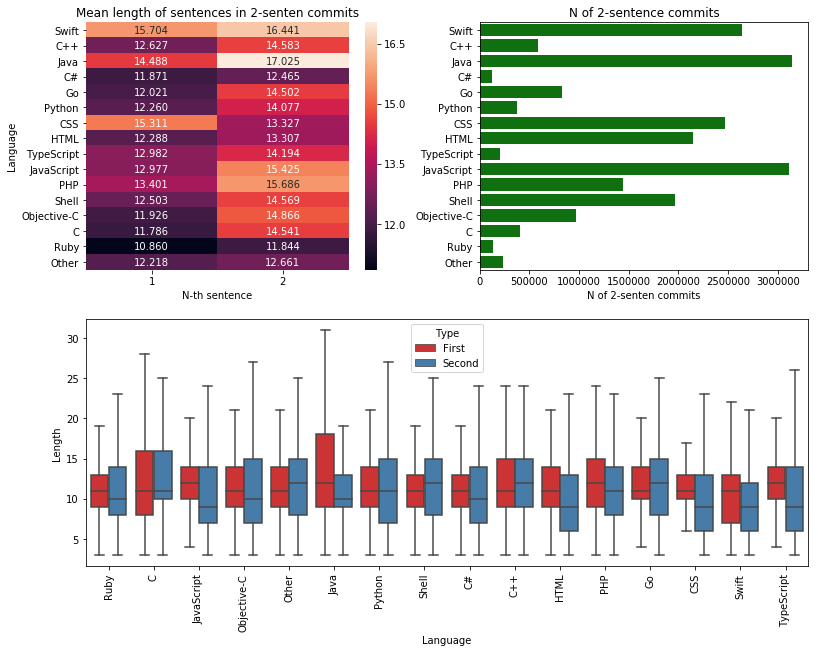

In [80]:
n=2
fig = plt.figure(figsize=(20,10))
#ax1 = fig.add_subplot(221)
#ax2 = fig.add_subplot(222)
ax1 = plt.subplot2grid((2, 3), (0, 1), colspan=1)
ax2 = plt.subplot2grid((2, 3), (0, 2), colspan=1)
ax3 = plt.subplot2grid((2, 3), (1, 1), colspan=2)

#A, N, matrix_df = show_lengths(n=n)
A, N = df.groupby(by='Language').mean()[['First', 'Second']].values, df.groupby(by='Language').count()['First'].values
ax1 = sns.heatmap(A, annot=True, fmt=".3f", yticklabels=labels, xticklabels=list(range(1,n+1)), ax=ax1)
ax1.set_xlabel('N-th sentence')
ax1.set_ylabel('Language')
ax1.set_title('Mean length of sentences in {}-senten commits'.format(n))

_ = pd.DataFrame(data={'N':N})
_.index = labels
ax2 = sns.barplot(data=_.T, color='green', ecolor='black', orient='h', ax=ax2)
ax2.set_xlabel('N of {}-senten commits'.format(n));
ax2.set_title('N of {}-sentence commits'.format(n))

ax3 = sns.boxplot(data=matrix_df, x=matrix_df['Language'], 
                  y=matrix_df['Value'], hue=matrix_df['Type'], palette="Set1", showfliers=False, ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation = 90)
ax3.set_xlabel('Language'.format(n))
ax3.set_ylabel('Length'.format(n));

plt.show()

In [59]:
print_text()

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

TypeError: 'NoneType' object is not subscriptable

In [58]:
def print_text():
    with open('/home/glznv/all_commits.txt', 'w') as f:
        mycursor.execute('SELECT text, id FROM C;')
        text = mycursor.fetchone()
        while text:
            doc = re.sub('\n+', ' ', text[0]).lower()#conllu.parse(text[0])
            print(doc, file=f)
            text = mycursor.fetchone()
            if text[1] % 1000000 == 0:
                print('|', end='')

In [ ]:
repos

In [ ]:
def yield_commits(out='gensim', mode='lemma', joint=True):
    mycursor.execute('SELECT text, name, language FROM C LEFT JOIN R ON C.repo_id=R.gh_id;')
    text = mycursor.fetchone()
    #print (text)
    while text:
        doc = connlu_parse(text[0], out=out, mode=mode, joint=joint)
        for sent in doc:
            yield text[1], sent
        text = mycursor.fetchone()

In [25]:
class CommitIterator:
    def __init__(self):
        self.cursor = mydb.cursor()
        self.cursor.execute('SELECT conllu from C LIMIT 10')
        self.text = []
    def __iter__(self):
        return self
    def  __next__(self):
        if not self.text:
            self.text = self.cursor.fetchone()
            if not self.text:
                raise StopIteration
            else:
                self.text =connlu_parse(self.text[0])
        for i in self.text:
            yield i

In [42]:
x = [x for x in yield_commits()]

In [71]:
class CommitIterator2:
    def __init__(self):
        self.cursor = mydb.cursor()
        self.cursor.execute('SELECT conllu from C LIMIT 10')
        self.text = []
    def __iter__(self):
        if not self.text:
            self.text = self.cursor.fetchone()
            if not self.text:
                raise StopIteration
            else:
                self.text =connlu_parse(self.text[0])[::-1]
        current = self.text[-1]
        del self.text[-1]
        return current

In [51]:
w2v = gensim.models.word2vec.Word2Vec(sentences=x, size=300,  window=5, seed=23,  workers=7, 
                                      min_count=10, sorted_vocab=1)